In [26]:
import torch
from torchvision import transforms
from PIL import Image
import os
import matplotlib.pyplot as plt
from Flood_VGG16 import VGG16Custom  # Import the custom VGG16 model class

# Device 설정 (GPU가 있으면 사용)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 이미지 전처리: Flood_VGG16.py에서 사용한 동일한 전처리를 적용
transform = transforms.Compose([
    transforms.Lambda(lambda img: transforms.functional.center_crop(img, min(img.size))),
    transforms.Resize((225, 225)),
    transforms.ToTensor()
])

# 모델 불러오기 및 체크포인트 로드
model = VGG16Custom(num_classes=5).to(device)
checkpoint_path = r'C:\Users\computer\Desktop\Code\KISTI\Flood\checkpoint\vgg16_best_checkpoint_v2.pth'

if os.path.exists(checkpoint_path):
    checkpoint = torch.load(checkpoint_path, map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()
else:
    print("Checkpoint 파일을 찾을 수 없습니다.")
    exit()

# 추론할 이미지 파일 경로 리스트 설정
image_paths = [
    r'C:\Users\computer\Desktop\Code\KISTI\Flood\dataset\test\2\21.png',
    # Add 9 more image paths here
]

# 클래스 이름 설정
class_names = ['1', '2', '3', '4', '5']  # 폴더 이름과 같은 클래스 이름

# 각 이미지에 대해 추론하고, 결과를 보여줌
plt.figure(figsize=(15, 10))
for idx, image_path in enumerate(image_paths):
    image = Image.open(image_path).convert('RGB')
    image_tensor = transform(image).unsqueeze(0).to(device)
    
    with torch.no_grad():
        output = model(image_tensor)
        _, predicted = torch.max(output, 1)
    
    predicted_class = class_names[predicted.item()]
    
    # 이미지와 예측 결과를 화면에 표시
    plt.subplot(2, 5, idx + 1)
    plt.imshow(image)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')

plt.tight_layout()
plt.show()


C:\Users\computer\AppData\Local\Temp\ipykernel_26448\904399722.py:23: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=dev

RuntimeError: Error(s) in loading state_dict for VGG16Custom:
	Missing key(s) in state_dict: "classifier.2.weight", "classifier.2.bias", "classifier.4.weight", "classifier.4.bias". 
	Unexpected key(s) in state_dict: "classifier.6.weight", "classifier.6.bias", "classifier.3.weight", "classifier.3.bias". 

예측된 클래스: 5


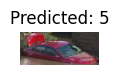

In [52]:
import torch
from torchvision import transforms
from PIL import Image
import os
import matplotlib.pyplot as plt
from Flood_VGG16 import VGG16Custom  # Flood_VGG16.py 파일에서 VGG16Custom 클래스를 불러옴

# Device 설정 (GPU가 있으면 사용)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 이미지 전처리: Flood_VGG16.py에서 사용한 동일한 전처리를 적용
transform = transforms.Compose([
    transforms.Lambda(lambda img: transforms.functional.center_crop(img, min(img.size))),
    transforms.Resize((225, 225)),
    transforms.ToTensor()
])

# 모델 불러오기 및 체크포인트 로드
model = VGG16Custom(num_classes=5).to(device)
checkpoint_path = r'C:\Users\computer\Desktop\Code\KISTI\Flood\checkpoint\vgg16_best_checkpoint_v2.pth'  # 저장된 체크포인트 파일 경로
# if os.path.exists(checkpoint_path):
#     checkpoint = torch.load(checkpoint_path, map_location=device)
#     model.load_state_dict(checkpoint['model_state_dict'])
#     model.eval()
# else:
#     print("Checkpoint 파일을 찾을 수 없습니다.")
#     exit()

# 추론할 이미지 파일 경로 설정
image_path = [r'C:\Users\computer\Desktop\Code\KISTI\Flood\dataset\test\5\5_34.jpg']

for i in range(len(image_path)):
    # 이미지 로드 및 전처리
    image = Image.open(image_path[i]).convert('RGB')  # 이미지를 RGB로 변환하여 3채널로 맞춤
    image_tensor = transform(image).unsqueeze(0).to(device)  # 배치 차원 추가 및 디바이스로 이동

    # 모델을 사용하여 추론
    with torch.no_grad():
        output = model(image_tensor)
        _, predicted = torch.max(output, 1)

    # 결과 출력
    class_names = ['1', '2', '3', '4', '5']  # 폴더 이름과 같은 클래스 이름
    predicted_class = class_names[predicted.item()]
    print(f"예측된 클래스: {predicted_class}")

    # 결과 시각화
    plt.figure(figsize=(12, 12))
    plt.subplot(1, 10, i+1)
    plt.imshow(image)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')  # 축 숨기기
    save_path = r"C:\Users\computer\Desktop\hi\predicted_image.png"  # 이미지 저장 경로 설정
    plt.savefig(save_path)  # 예측 결과가 포함된 이미지 저장
plt.show()  # 결과를 화면에 출력
